**第六章   卷积神经网络**

x tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[19., 25.],
        [37., 43.]])
x1= tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
y1=
 tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])
y= tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


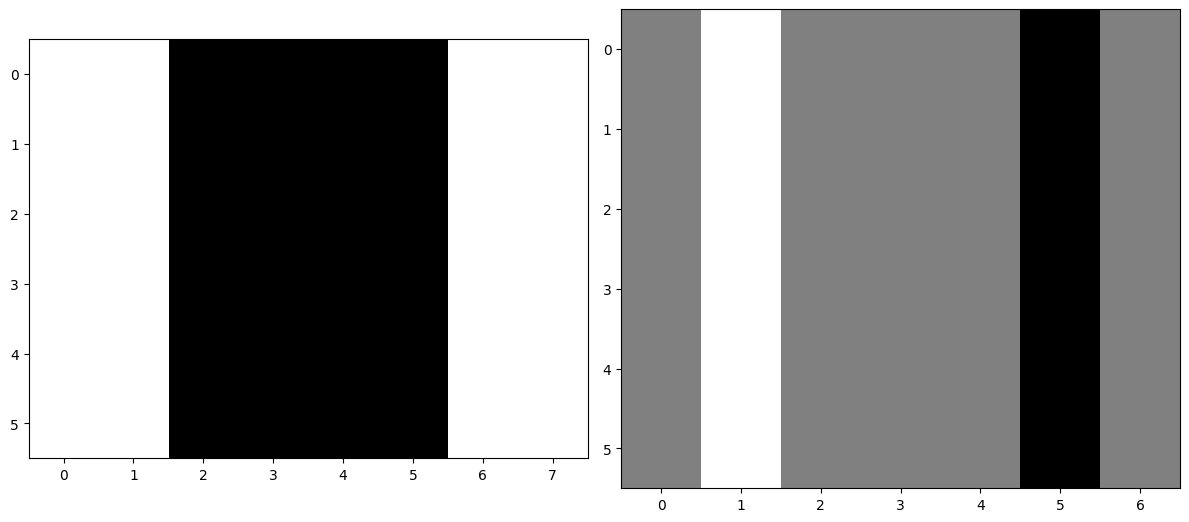

epoch2,loss:13.617281913757324
epoch4,loss:3.580942153930664
epoch6,loss:1.1317641735076904
epoch8,loss:0.40736860036849976
epoch10,loss:0.1574290245771408
conv2d(x).shape= torch.Size([1, 1, 8, 8])


torch.Size([4, 4])

In [3]:
import torch
from torch import nn
def corr2d(x,k):
    """二维互相关运算"""
    h,w=k.shape
    y=torch.zeros((x.shape[0]-h+1,x.shape[1]-w+1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i,j]=(x[i:i+h,j:j+w]*k).sum()
    return y
x=torch.arange(9).reshape(3,3)
print("x",x)
k=torch.arange(4).reshape(2,2)
print(corr2d(x,k))       
    
#6.2.2卷积层
class Conv2D(nn.Module):
    def __init__(self,k):
        super().__init__()
        self.weight=nn.Parameter(torch.rand(k))
        self.bias=nn.Parameter(torch.zeros(1))
    def forward(self,x):
        return corr2d(x,self.weight)+self.bias
x=torch.ones((6,8))
x[:,2:6]=0
print("x1=",x)
k=torch.tensor([[1,-1]])
y=corr2d(x,k)
x=torch.ones((6,8))
x[:,2:6]=0
k=torch.tensor([[1.0,-1.0]])
y=torch.zeros(6,7)
for i in range(6):
    for j in range(7):
        y[i,j]=(x[i:i+1,j:j+2]*k).sum()
print("y1=\n",y)
x=torch.ones((6,8))
x[:,2:6]=0

k=torch.tensor([[1.0,-1.0]])
y=corr2d(x,k)
print("y=",y)  
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)#1行，2列第一个
plt.imshow(x.numpy(),cmap='gray')


plt.subplot(1,2,2)
plt.imshow(y.numpy(),cmap='gray') 
plt.tight_layout()
plt.show()     
conv2d=nn.Conv2d(1,1,kernel_size=(1,2),bias=False)

x=x.reshape((1,1,6,8))
y=y.reshape((1,1,6,7))
lr=3e-2
for i in range(10):
    y_hat=conv2d(x)
    l=(y_hat-y)**2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:]-=lr*conv2d.weight.grad
    if(i+1)%2==0:
        print(f"epoch{i+1},loss:{l.sum()}")
        
conv2d=nn.Conv2d(in_channels=1,out_channels=1,kernel_size=(3,5),padding=(1,2))
x=torch.rand(size=(1,1,8,8))

y=conv2d(x)
print("conv2d(x).shape=",y.shape)
#这是为了给x从[6,6]到[1,1,6,6]
#之后再把y换回来

def camp_conv2d(conv2d,x):
    x=x.reshape((1,1)+x.shape)
    y=conv2d(x)
    return y.reshape(y.shape[2:])
conv2d1=nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=2,padding=(1,1))
x=torch.randn((8,8))
camp_conv2d(conv2d1,x).shape


K.shape=
 torch.Size([3, 2, 2, 2])
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
现在可以用的设备:cuda:0
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
        

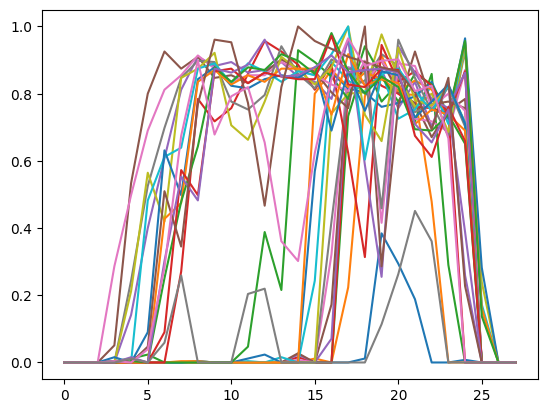

tensor([9])
第0轮，第0次损失为2.347696304321289
第0轮，第1次损失为2.3175759315490723
第0轮，第2次损失为2.3102760314941406
第0轮，第3次损失为2.3110451698303223
第0轮，第4次损失为2.2983672618865967
第0轮，第5次损失为2.3290646076202393
第0轮，第6次损失为2.3167550563812256
第0轮，第7次损失为2.252713203430176
第0轮，第8次损失为2.302278995513916
第0轮，第9次损失为2.337569236755371
第0轮，第10次损失为2.359807252883911
第0轮，第11次损失为2.305006504058838
第0轮，第12次损失为2.3244457244873047
第0轮，第13次损失为2.311946392059326
第0轮，第14次损失为2.3165454864501953
第0轮，第15次损失为2.2575416564941406
第0轮，第16次损失为2.296377658843994
第0轮，第17次损失为2.3426902294158936
第0轮，第18次损失为2.323056221008301
第0轮，第19次损失为2.320235252380371
第0轮，第20次损失为2.3034744262695312
第0轮，第21次损失为2.2940714359283447
第0轮，第22次损失为2.310689926147461
第0轮，第23次损失为2.314154624938965
第0轮，第24次损失为2.2992045879364014
第0轮，第25次损失为2.314453601837158
第0轮，第26次损失为2.2922306060791016
第0轮，第27次损失为2.322120428085327
第0轮，第28次损失为2.318498134613037
第0轮，第29次损失为2.3006300926208496
第0轮，第30次损失为2.3074755668640137
第0轮，第31次损失为2.324686050415039
第0轮，第32次损失为2.265472412109375
第0轮，第33次损失为2.299346923828

In [8]:
import torch
import torch.nn as nn

def corr2d_multi_in(x,k):
    return sum(corr2d(x,k) for x,k in zip(x,k))
x=torch.tensor([[
    [0,1,2],[3,4,5],[6,7,8]
],[[1,2,3],[4,5,6],[7,8,9]]
                ])
k=torch.tensor([[[0,1],[2,3]],[[1,2],[3,4]]])
corr2d_multi_in(x,k)

def corr2d_multi_in_out(x,K):
    return torch.stack([corr2d_multi_in(x,k) for k in K],0)
K=torch.stack([k,k+1,k+2],0)
print("K.shape=\n",K.shape)
corr2d_multi_in_out(x,K)

def pool2d(x,pool_size=(2,2),mode='max'):
    ph,pw=pool_size
    y=torch.zeros((x.shape[0]-ph+1,x.shape[1]-pw+1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            if mode=='max':
                y[i,j]=x[i:i+ph,j:j+pw].max()
            elif mode=='mean':
                y[i,j]=x[i:i+ph,j:j+pw].mean()
    return y
x=torch.arange(9,dtype=torch.float32).reshape(3,3)
print(x)
pool2d(x,(2,2),'max')
print(x)
pool2d(x,(2,2),mode='mean')
x=torch.arange(16,dtype=torch.float32).reshape((1,1,4,4))
pool2d=nn.MaxPool2d(kernel_size=3)
pool2d(x)
pool2d=nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
pool2d(x)       
net=nn.Sequential(
    nn.Conv2d(1,6,kernel_size=5,padding=2),nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Conv2d(6,16,kernel_size=5,padding=2),nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Flatten(),
    nn.Linear(784,120),nn.Sigmoid(),
    nn.Linear(120,84),nn.Sigmoid(),
    nn.Linear(84,10)
    
)
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print(f"现在可以用的设备:{device}")
net.to(device)
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# Download and load the Fashion MNIST dataset
fashion_mnist_train = datasets.FashionMNIST(
    root='/home/pumengyu/2025_9python/download',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
fashion_mnist_test=datasets.FashionMNIST(
    root="/home/pumengyu/2025_9python/download",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
#损失函数
loss=nn.CrossEntropyLoss()
#优化器
optimizer=torch.optim.Adam(net.parameters(),lr=1e-3)
import matplotlib.pyplot as plt
train_dataloader=DataLoader(dataset=fashion_mnist_train,batch_size=64,shuffle=True)
test_dataloader=DataLoader(dataset=fashion_mnist_test,shuffle=True,batch_size=64)
train_dataloader1=DataLoader(dataset=fashion_mnist_train,batch_size=1,shuffle=False)
for i,(image,label) in enumerate(train_dataloader1):
    print(image)
    
    plt.plot(image.squeeze((0,1)).numpy())
    plt.show()
    print(label)
    break

net.train()
for epoch in range(10):
    for i,(image,labels) in enumerate(train_dataloader):
        image=image.to(device)
        labels=labels.to(device)
        output=net(image)
        
        loss1=loss(output,labels)
        loss1.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"第{epoch}轮，第{i}次损失为{loss1}")
net.eval()
loss1=0
index=0
curracy=0
with torch.no_grad():
    for i,(image,labels) in enumerate(test_dataloader):
        image=image.to(device)
        labels=labels.to(device)
        output=net(image)
        _,output=torch.max(output,dim=1)#返回max,max_indces
        curracy+=(output==labels).sum()
        index+=labels.size(0)


    
print("最后测试精度",curracy/index)



       
x=torch.randn((1,1,28,28),dtype=torch.float32)
# for layer in net:
#     x=layer(x)
#     print(layer.__class__.__name__,'output shape: \t',x.shape)
